In [6]:
import os
# from utils import set_watermark
import polars as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [2]:
def color_mapping(df:pl.DataFrame, image_pardir: str | Path) -> cv2.Mat:
    if not isinstance(image_pardir, Path):
        image_pardir = Path(image_pardir)

    # 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
    colors = ((180, 119, 31), (14, 127, 255), (44, 160, 44), (40, 39, 214), (189, 103, 148), (75, 86, 140), (194, 219, 227), (127, 127, 127), (34, 189, 188), (207, 190, 23), (0, 0, 0))
    
    alpha = 0.8
    beta = 1 - alpha
    
    v_img: list[cv2.Mat] = []
    h_img: list[cv2.Mat] = []
    
    try:
        image_paths_and_clusters = df.select([pl.col("filepath"), pl.col("cluster")]).to_numpy()
    except:
        filepath_expr = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
        image_paths_and_clusters = df.select([filepath_expr,pl.col("cluster")]).to_numpy()
    
    # for i, (image_path, main_cluster, sub_cluster) in enumerate(image_paths_and_clusters):
    for i, (image_path, main_cluster,) in enumerate(image_paths_and_clusters):
        # print(i)
        image: cv2.Mat = cv2.imread(str(image_pardir / image_path))

        img_filter = np.zeros(image.shape[:], dtype=np.uint8)
        img_filter[:] = colors[main_cluster]
        
        image = cv2.addWeighted(image, alpha, img_filter, beta, 0)

        h_img.append(image)

        if (i+1) % 40 == 0:
            v_img.append(cv2.hconcat(h_img))
            h_img.clear()
            
    
    return cv2.vconcat(v_img)

---

In [7]:
# csv_root = Path('/home/shinsei/img_crop/forest/AdamPaper/feature/clusterized/vbgm_pca3_forest_for_check_lr1e-03_lf6.4e+01_epoch1000_SPARSE_CAE_rho05_beta05_selu.csv')
lf = 64
AE_model = 'cae'
csv_root = Path('/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_check_data_clustering.csv')
save_dir = Path('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-10/reconcatenate_images')
df = pl.read_csv(csv_root)
# mask = (df_pca_lf500['height_class'].values >= 1) & (df_pca_lf500['height_class'].values <= 3)
# out_pca = rebuilt_image(df_pca_lf500[mask])
# out_pca_lf500 = rebuilt_image(df_pca_lf500)

In [8]:
df

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.081187,0.641306,-0.29807,0.392791,-0.463166,-0.01242,0.454063,-0.266112,0.517888,-0.4535,0.41035,-0.357184,0.435353,0.665033,0.253357,0.323617,-0.210334,-0.466924,0.293595,0.048125,-0.369211,0.311697,-0.15129,-0.361674,-0.582406,0.513421,0.17603,0.861688,0.389199,-0.031552,0.546803,-0.246826,-0.01077,-0.774627,0.009406,0.416058,-0.686513,…,0.000734,0.184057,0.065019,-0.36605,0.356607,-0.180316,-0.165681,0.02002,-0.757273,-0.2726,0.316256,-0.562363,0.159933,0.470357,0.451203,0.316254,-0.242803,0.277422,0.208594,-0.428476,0.23064,0.045281,0.182319,-0.168563,0.496287,0.086871,0.423506,1.223074,0.520453,-0.160121,0.579021,-0.293285,0.232095,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",2
-0.240604,0.186281,0.280357,-0.407733,0.591664,-0.003713,0.541309,0.310418,1.050839,-0.113707,-0.409277,0.196771,0.183466,0.143439,-0.147569,0.150694,-0.164402,0.524919,0.099723,0.526067,0.638474,0.457185,1.4941,-0.167325,-0.837436,-0.217173,-0.466745,0.427481,0.072993,-0.217203,0.892269,0.79581,-0.573997,0.089553,0.184387,0.052235,0.801418,…,0.996491,-0.728317,0.444236,0.585103,-0.090143,0.308813,-0.81049,-0.10033,-0.476777,-0.503833,0.195189,0.188452,-0.218358,0.750219,-0.38594,-0.783674,0.158368,-0.00145,0.284141,0.128518,0.19822,-0.610342,0.039718,0.030443,0.344347,-0.215181,0.409776,-0.919662,0.368075,-0.610561,0.465858,0.147057,0.215668,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.488357,0.622537,0.039477,0.107401,0.167747,-0.263835,-0.197042,0.246984,0.506997,0.04473,0.403341,0.074363,0.682993,0.478376,-0.764804,-0.288972,-0.710901,0.537684,-0.145632,0.006442,-0.077593,-0.055091,-0.441037,-0.004357,-0.424964,0.081613,0.50264,0.004408,-0.125338,-0.081806,-0.225509,-0.194922,-0.025063,0.114091,0.552873,0.360022,-0.211636,…,-0.089129,-0.718762,-0.278203,0.749432,-0.653637,-0.009453,0.236249,0.23363,-0.785358,0.006613,-0.47849,-0.070813,-0.258218,-0.749164,-0.191288,0.127218,1.022747,0.555098,0.516802,0.501803,-0.678717,0.214815,-0.028941,-0.447416,0.281469,-0.853215,0.129239,0.519929,-0.250867,-0.508604,0.331913,-0.052148,0.051363,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",3
0.14232,0.833983,0.044417,0.02871,0.28038,0.384736,0.728963,0.417456,0.308815,0.444215,0.388266,-0.531925,0.456765,0.138868,1.056183,-0.425641,0.320917,0.196895,0.071539,0.404908,-0.74635,0.284718,0.343171,-0.938629,-0.971037,0.591346,-0.779473,0.899692,-0.359922,-0.163241,0.803512,0.069276,-0.746752,0.746933,0.383587,-0.558369,-0.072739,…,-0.0441,0.302166,0.239553,0.354353,0.18268,0.08521,-0.761343,-0.446473,0.304414,-0.952067,-0.047888,-0.554721,0.214581,0.011604,0.392295,0.166104,0.490512,-0.071409,1.012665,0.971091,0.136275,0.075375,-0.548449,0.272786,0.264022,0.351493,-0.281979,0.358343,0.698304,-0.844583,0.143866,-0.191383,-0.360749,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",4
0.297355,0.001727,0.311982,-0.658734,0.514037,0.085714,0.02021,-0.435643,-0.04251,-0.374594,0.147983,-0.112143,-0.442718,0.002179,-0.409567,0.397173,0.304804,0.197

In [5]:
save_dir

PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-10/reconcatenate_images')

In [11]:
!pwd

/home/shinsei/MyResearchs/feat_extrc/notebooks


In [16]:
Path('../data/processed/check/CNTForest/cnt_sem_for_check_32x32/10k/').exists()

True

In [49]:
# img_classes = df['image_class'].values
# if not os.path.exists(save_dir / f'colormap_{AE_model}_lf{lf}'):
#     os.makedirs(save_dir / f'colormap_{AE_model}_lf{lf}')
img_classes = df.select(pl.col("dirname")).to_numpy().flatten()
imgs: list[cv2.Mat] = []
for l in np.unique(img_classes):
    print(l)
    img = color_mapping(df.filter(pl.col("dirname") == l), '../data/processed/check/CNTForest/cnt_sem_for_check_32x32/10k/')
    imgs.append(img)
    # cv2.imwrite(str(save_dir/'colormap_{AE_model}_lf{lf}'/f'image_class{l}.png'), img)
    cv2.imwrite(str(save_dir/f'image_class{l}.png'), img)

0
1
2
3
4
5
6
7
8


In [44]:
df.filter(pl.col("dirname") == 9).select(pl.col("cluster"))

cluster
i64


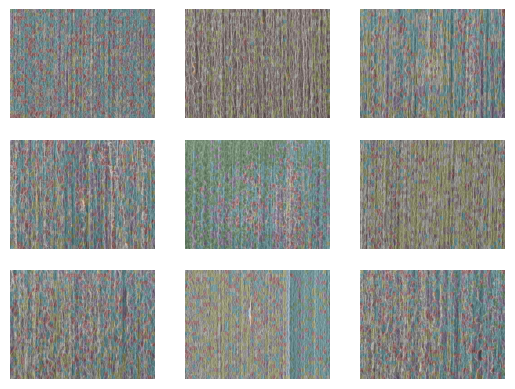

In [48]:
fig = plt.figure()
for i, img in enumerate(imgs):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_axis_off()